# MÁSTER UNIVERSITARIO EN CIENCIAS ACTUARIALES Y FINANCIERAS 
## RENTA VARIABLE Y DERIVADOS FINANCIEROS
### Práctica 1. Bonos sintéticos y forward
#### Calcule el precio y la TIR del bono X conocidos los bonos A, B, C, D y E que cotizan en un mercado de renta fija. Realice los cálculos por dos métodos al menos.

In [1]:
# Instalación librerías
pip install numpy-financial

# Importación de librerías
import numpy_financial as npf
import matplotlib.pyplot as plt
import numpy as np

Datos

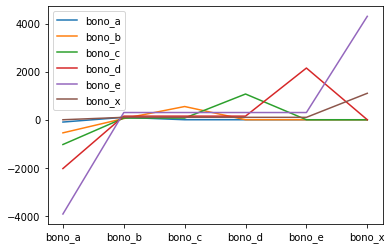

In [40]:
# Datos
bono_a = [-96,100,0,0,0,0]
bono_b = [-545,50,550,0,0,0]
bono_c = [-1030,70,70,1070,0,0]
bono_d = [-2030,150,150,150,2150,0]
bono_e = [-3920,300,300,300,300,4300]
bono_x = [0,100,100,100,100,1100]

# Mostrar gráficamente datos

# create data
x = ["bono_a","bono_b","bono_c","bono_d","bono_e","bono_x"]
  
# plot lines
plt.plot(x, bono_a, label = "bono_a")
plt.plot(x, bono_b, label = "bono_b")
plt.plot(x, bono_c, label = "bono_c")
plt.plot(x, bono_d, label = "bono_d")
plt.plot(x, bono_e, label = "bono_e")
plt.plot(x, bono_x, label = "bono_x")
plt.legend()
plt.show()

Cálculo de la TIR


----------------------------------------
Bonos: a,b,c,d,e
TIR: (0.04166666666666674, 0.05149500402450147, 0.05880158196428731, 0.0705659192906809, 0.08000925122822622)
----------------------------------------



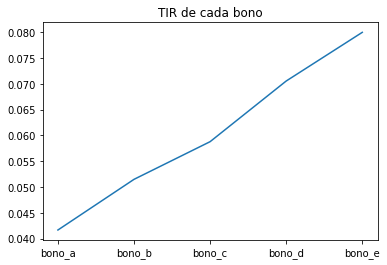

In [41]:
# Cálculo de la TIR
tir_a = npf.irr(bono_a)
tir_b = npf.irr(bono_b)
tir_c = npf.irr(bono_c)
tir_d = npf.irr(bono_d)
tir_e = npf.irr(bono_e)

tir = tir_a,tir_b,tir_c,tir_d,tir_e

# Resultados TIR
print(f"""
{'-'*40}
Bonos: a,b,c,d,e
TIR: {tir}
{'-'*40}
""")

# Resultados TIR gráficamente
plt.title('TIR de cada bono')
plt.plot(
    ("bono_a","bono_b","bono_c","bono_d","bono_e"),
    (tir))

Cálculo de ETTI


----------------------------------------
Years: 0,1,2,3,4
ETTI: [0.04166666666666674, 0.05196950480239937, 0.05954698846803952, 0.07260473284719349, 0.08331184471944098]
----------------------------------------



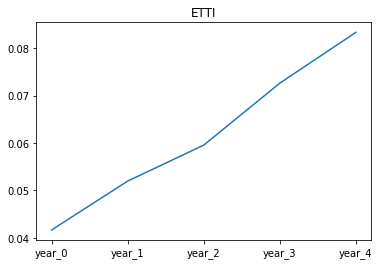

In [42]:
# Cálculo ETTI

def calcular_etti(bono, etti):
    n = [i for i, e in enumerate(bono) if e!=0][-1]
    last_cf = bono[n]
    precio = -bono[0]
    cf_disc = 0
    for i in range(1,n):
        cf_disc += bono[i] / (1+etti[i-1])**i
    return (last_cf / (precio - cf_disc))**(1/n)-1

etti[0] = calcular_etti(bono_a, etti)
etti[1] = calcular_etti(bono_b, etti)
etti[2] = calcular_etti(bono_c, etti)
etti[3] = calcular_etti(bono_d, etti)
etti[4] = calcular_etti(bono_e, etti)

# Resultados ETTI
print(f"""
{'-'*40}
Years: 0,1,2,3,4
ETTI: {etti}
{'-'*40}
""")

# Resultados ETTI gráficamente
plt.title('ETTI')
plt.plot(
    ("year_0","year_1","year_2","year_3","year_4"),
    (etti))


Cálculo del precio del bono de su TIR


----------------------------------------
Precio del bono: 1083.2522022742555
TIR del bono: 0.07919326410861216
Flujos del bono
Years: 0,1,2,3,4
ETTI: [-1083.2522022742555, 100, 100, 100, 100, 1100]
----------------------------------------



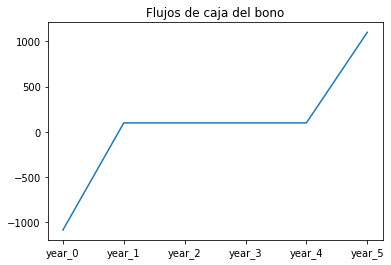

In [43]:
# Cálculo del precio del bono y su TIR

def calcular_precio_bono(cf, int):
    precio = 0
    for i in range(1, len(cf)):
        precio += cf[i] * (1+int[i-1])**-i
    return precio

precio_bono_x = calcular_precio_bono(bono_x, etti)
bono_x[0] = -precio_bono_x
tir_x = npf.irr(bono_x)

# Resultados del bono
print(f"""
{'-'*40}
Precio del bono: {precio_bono_x}
TIR del bono: {tir_x}
Flujos del bono
Years: 0,1,2,3,4
ETTI: {bono_x}
{'-'*40}
""")

# Resultados del bono gráficamente
plt.title('Flujos de caja del bono')
plt.plot(
    ("year_0","year_1","year_2","year_3","year_4","year_5"),
    (bono_x))